In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#coordinates[:3]

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [6]:
from config import weather_api_key
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

#config.weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kokopo
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | tigil
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | truckee
Processing Record 11 of Set 1 | homer
Processing Record 12 of Set 1 | yerbogachen
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | le port
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | dikson
City not found. Skipping...
Processing Record 17 of Set 1 | chanthaburi
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bluff
Processing Record

Processing Record 36 of Set 4 | grosbous
Processing Record 37 of Set 4 | esperance
Processing Record 38 of Set 4 | micheweni
Processing Record 39 of Set 4 | samusu
City not found. Skipping...
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | kuito
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | virginia beach
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | soure
Processing Record 47 of Set 4 | sur
Processing Record 48 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | oistins
Processing Record 2 of Set 5 | aguimes
Processing Record 3 of Set 5 | galateni
Processing Record 4 of Set 5 | hofn
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | gorontalo
Processing Record 8 

Processing Record 25 of Set 8 | kamaishi
Processing Record 26 of Set 8 | palmerston
Processing Record 27 of Set 8 | podgornoye
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | matara
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | airai
Processing Record 32 of Set 8 | doume
Processing Record 33 of Set 8 | moerai
Processing Record 34 of Set 8 | seoul
Processing Record 35 of Set 8 | bantry
Processing Record 36 of Set 8 | nacala
Processing Record 37 of Set 8 | ettaiyapuram
Processing Record 38 of Set 8 | warrington
Processing Record 39 of Set 8 | clarence town
Processing Record 40 of Set 8 | sorland
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | karasjok
Processing Record 43 of Set 8 | chunskiy
Processing Record 44 of Set 8 | sumkino
Processing Record 45 of Set 8 | samana
Processing Record 46 of Set 8 | dogondoutchi
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | 

Processing Record 13 of Set 12 | salo
Processing Record 14 of Set 12 | talaya
Processing Record 15 of Set 12 | tulum
Processing Record 16 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 12 | barbar
City not found. Skipping...
Processing Record 18 of Set 12 | maniwaki
Processing Record 19 of Set 12 | qaqortoq
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | pidhorodne
Processing Record 22 of Set 12 | mezen
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | rocha
Processing Record 25 of Set 12 | hunza
City not found. Skipping...
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | uarini
Processing Record 28 of Set 12 | impfondo
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | tezu
Processing Record 31 of Set 12 | bonavista
Processing Record 32 of Set 12 | ambanja
Processing Record 33 of Set 12 | herre
Processing Record 34 of 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kokopo,-4.3520,152.2633,77.23,87,15,9.57,PG,2021-09-25 13:04:12
1,Hasaki,35.7333,140.8333,66.60,65,100,17.96,JP,2021-09-25 13:04:12
2,Busselton,-33.6500,115.3333,57.04,73,88,12.35,AU,2021-09-25 13:04:13
3,Tigil,57.8000,158.6667,40.21,76,0,3.44,RU,2021-09-25 13:04:13
4,Rikitea,-23.1203,-134.9692,73.74,74,20,16.13,PF,2021-09-25 13:04:14
5,Truckee,39.3280,-120.1833,62.37,54,1,0.00,US,2021-09-25 13:04:14
6,Homer,59.6425,-151.5483,37.80,85,1,0.00,US,2021-09-25 13:04:15
7,Yerbogachen,61.2767,108.0108,42.01,75,98,7.78,RU,2021-09-25 13:04:15
8,Yellowknife,62.4560,-114.3525,45.41,100,90,1.01,CA,2021-09-25 13:00:54
9,Le Port,-20.9373,55.2919,75.20,75,91,7.87,RE,2021-09-25 13:04:15


In [10]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

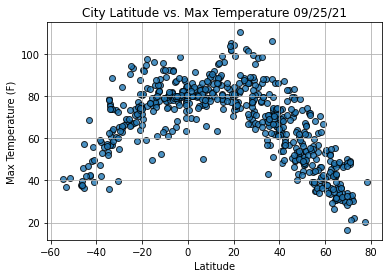

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

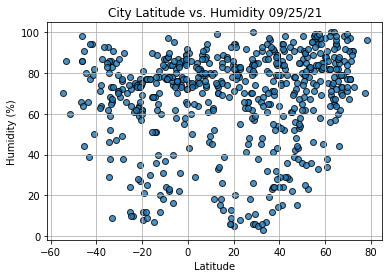

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

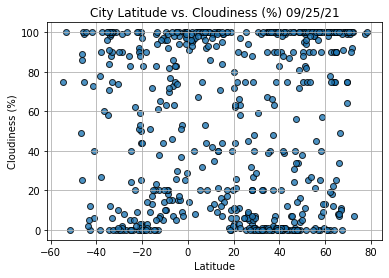

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

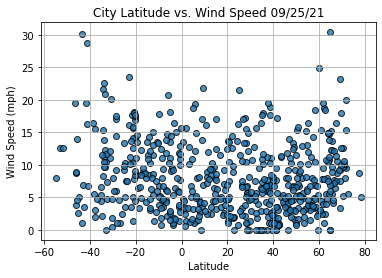

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

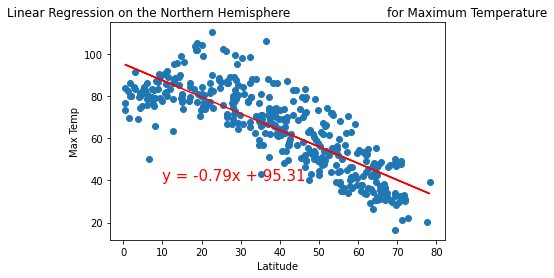

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))

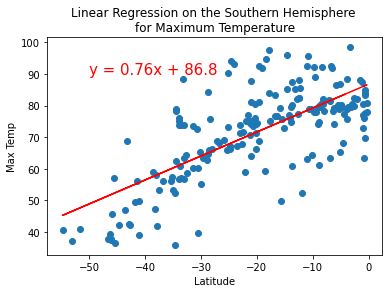

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(-50,90))

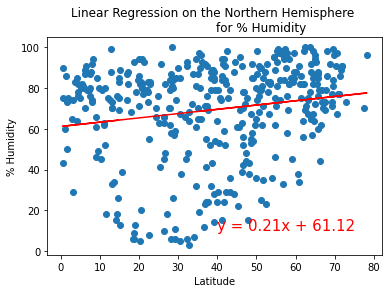

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

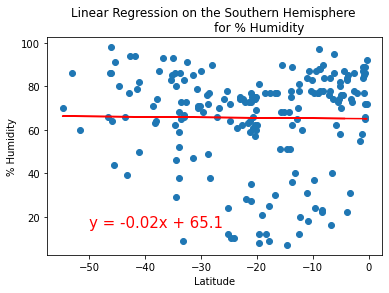

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                       for % Humidity', '% Humidity',(-50,15))

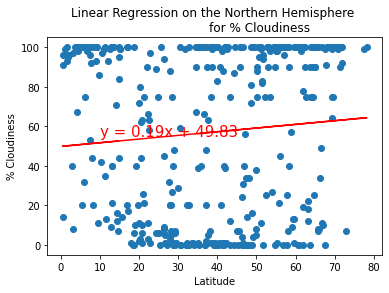

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                       for % Cloudiness', '% Cloudiness',(10,55))

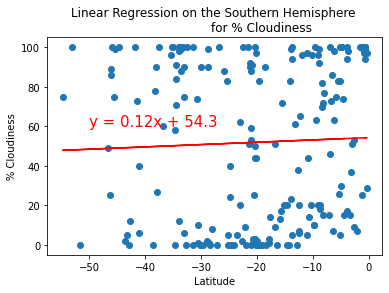

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

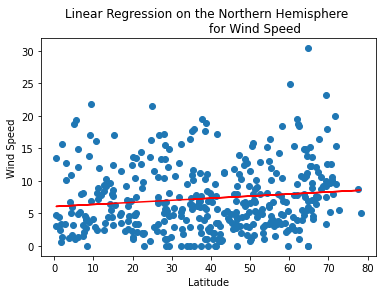

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

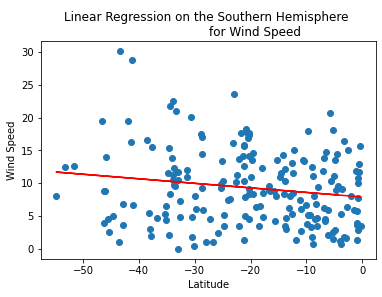

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,35))